In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(820, 6)

In [24]:
digits["true_label"].value_counts()

true_label
4    82
2    82
1    82
3    82
5    82
6    82
7    82
8    82
9    82
0    82
Name: count, dtype: int64

<Axes: xlabel='true_label', ylabel='Count'>

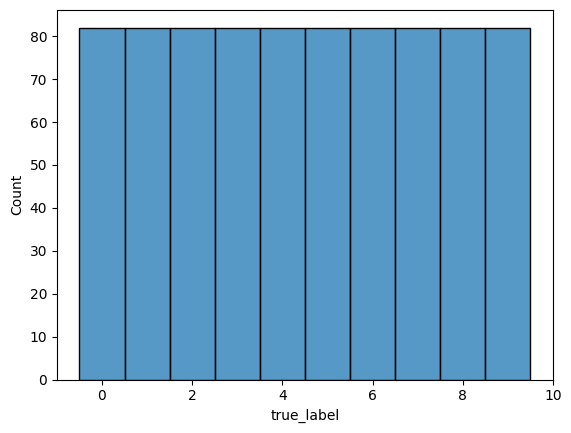

In [25]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [ ]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:2] == "09"]
oct = digits[digits["timestamp"].str[:2] == "10"]
# nov = digits[digits["timestamp"].str[:2] == "11"]

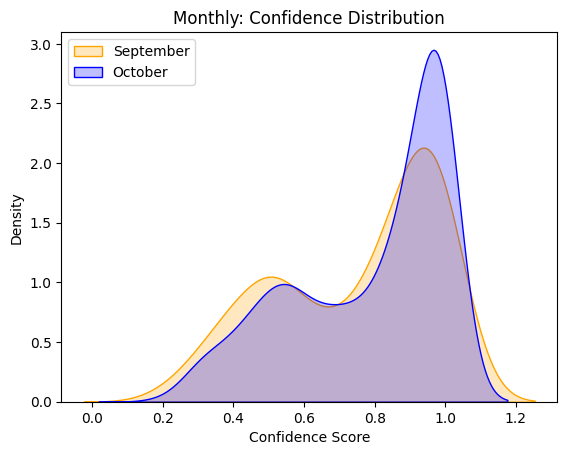

In [ ]:
sns.kdeplot(sept, x="confidence", color="orange", fill=True, label="September")
sns.kdeplot(oct, x="confidence", color="blue", fill=True, label="October")
# sns.kdeplot(nov, x="confidence", color="red", fill=True, label="November")
plt.title("Monthly: Confidence Distribution")  # no retrain at this point
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.legend()

In [43]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(820, 784)


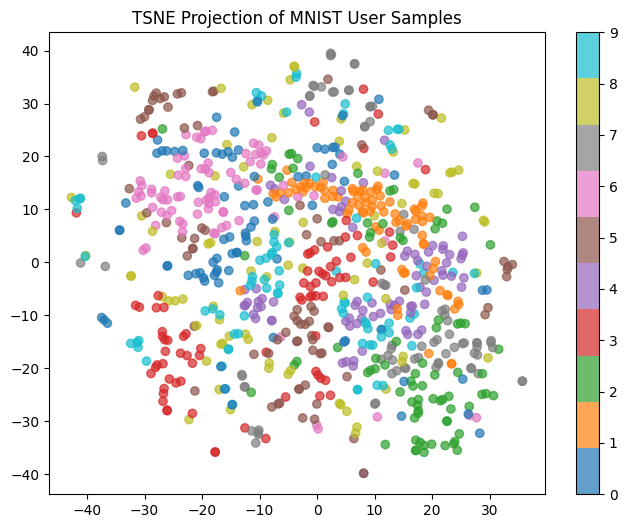

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()
